<a href="https://colab.research.google.com/github/Vishal64B/NNDL/blob/main/2347264_NNDL_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Kuzushiji-MNIST dataset
(ds_train, ds_test), ds_info = tfds.load('kmnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

# Function to normalize images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

# Normalize and batch the datasets
batch_size = 32
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.shuffle(1000).batch(batch_size)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)

# Convert datasets to NumPy arrays
def dataset_to_numpy(dataset):
    X, y = [], []
    for images, labels in dataset:
        X.extend(images.numpy())
        y.extend(labels.numpy())
    return np.array(X), np.array(y)

# Convert training and test datasets to NumPy arrays
X_train, y_train = dataset_to_numpy(ds_train)
X_test, y_test = dataset_to_numpy(ds_test)

# Split the training data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes of the datasets
print("Training set shape:", X_train.shape, "Labels shape:", y_train.shape)
print("Validation set shape:", X_val.shape, "Labels shape:", y_val.shape)
print("Test set shape:", X_test.shape, "Labels shape:", y_test.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.JA0RP3_3.0.1/kmnist-train.tfrecord*...:   0%|          |…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.JA0RP3_3.0.1/kmnist-test.tfrecord*...:   0%|          | …

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.
Training set shape: (48000, 28, 28, 1) Labels shape: (48000,)
Validation set shape: (12000, 28, 28, 1) Labels shape: (12000,)
Test set shape: (10000, 28, 28, 1) Labels shape: (10000,)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0980 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0973 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0995 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0977 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1005 - loss: 2.3026 - val_accuracy: 0.1023 - val_loss: 2.3026
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0995 - loss: 2.3026 - val_accurac

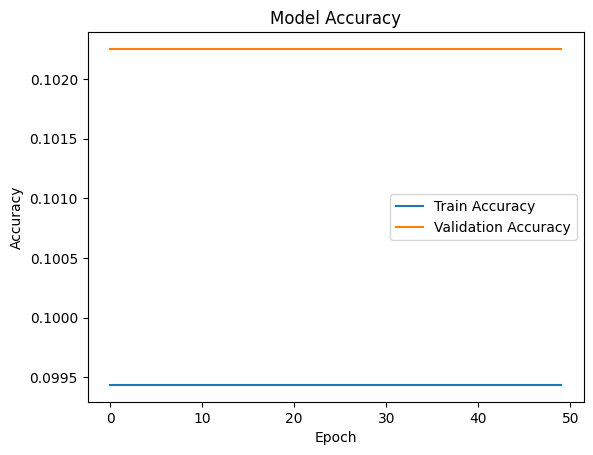

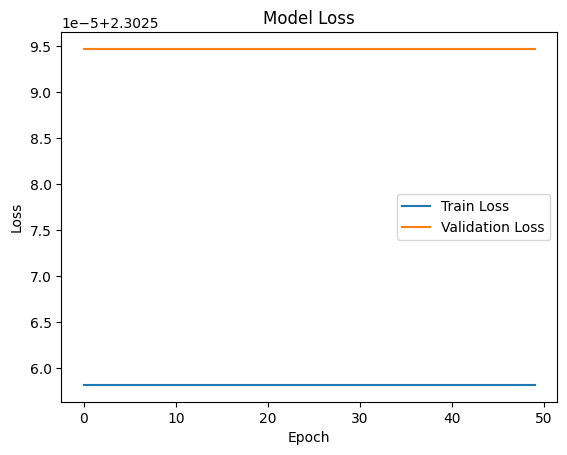

In [3]:
# Flatten the images to shape (batch_size, 784)
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Define the RBF Network class
class RBFNetwork(tf.keras.Model):
    def __init__(self, num_units, num_classes):
        super(RBFNetwork, self).__init__()
        self.num_units = num_units
        self.num_classes = num_classes
        # Initialize centers and weights
        self.centers = tf.Variable(tf.random.normal([self.num_units, 784]), trainable=False)
        self.beta = tf.Variable(tf.ones([self.num_units]), trainable=False)
        self.W = tf.Variable(tf.random.normal([self.num_units, self.num_classes]))

    def rbf(self, X):
        # Compute the Gaussian RBF
        diff = tf.expand_dims(X, 1) - tf.expand_dims(self.centers, 0)
        distance_squared = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.beta * distance_squared)

    def call(self, X):
        rbf_output = self.rbf(X)
        return tf.nn.softmax(tf.matmul(rbf_output, self.W))

# Create the RBF network instance
num_units = 100  # Number of RBF units
num_classes = 10  # Number of classes (0-9)
rbf_network = RBFNetwork(num_units, num_classes)

# Compile the model
rbf_network.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

# Train the model for 100 epochs
history = rbf_network.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Evaluate the model on the test set
test_loss, test_accuracy = rbf_network.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x700 with 0 Axes>

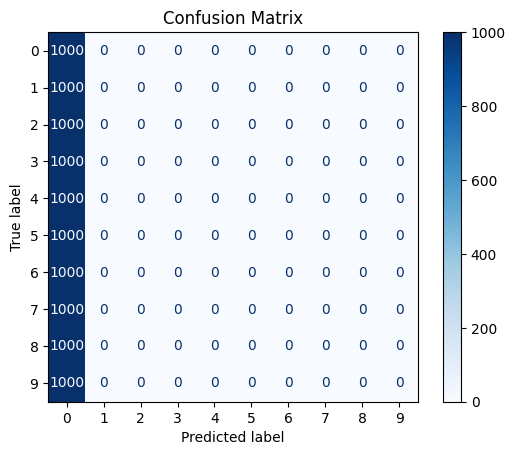

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = np.argmax(rbf_network.predict(X_test), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes)).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



# Analysis of RBF Network for Kuzushiji-MNIST Dataset

## Strengths
1. **Simplicity:** RBF networks are easy to interpret and understand.
2. **Non-Linear Modeling:** Effective for capturing non-linear relationships in data.
3. **Good Generalization:** When tuned properly, they generalize well to unseen data.
4. **Fast Training:** Training can be efficient, especially with fewer training samples.
5. **Locality:** RBFs focus on local regions, helping to handle data variations.

## Limitations
1. **Hyperparameter Sensitivity:** Performance depends heavily on the choice of hyperparameters like the number of units and spread (beta).
2. **Curse of Dimensionality:** Performance can degrade in high-dimensional spaces.
3. **Data Limitations:** May struggle with complex datasets or high-resolution images.
4. **Scalability Issues:** Larger datasets require more centers, complicating training.
5. **Complexity:** Requires careful management of the number of units to avoid overfitting or underfitting.

## Impact of RBF Units on Performance
- **Underfitting:** Too few units can lead to oversimplification and high error rates.
- **Overfitting:** Too many units can cause memorization of training data, lowering generalization.
- **Complexity vs. Efficiency:** More units increase model capacity but also computational demands.
- **Optimal Tuning:** Experimentation and validation are key to finding the right number of units, balancing performance and complexity.

## Conclusion
RBF networks offer interpretability and non-linear modeling capabilities, but careful tuning of hyperparameters and consideration of the number of units are crucial for effective performance on the Kuzushiji-MNIST dataset.
